# 필요한 라이브러리 import

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 얼굴 사진 불러오기

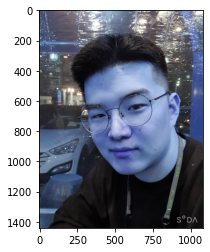

In [2]:
# opencv로 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/Ex_3/images/img.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()  # 출력용 이미지 보관.
plt.imshow(img_bgr)
plt.show()

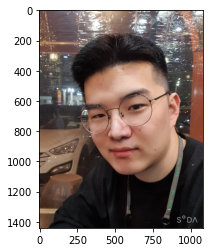

In [3]:
# RGB 변환 : openCV 는 BGR이기 때문.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출 (Face Detection)

In [4]:
# HOG Detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [5]:
# Bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # 두번째 파라미터 1은 이미지 피라미드의 수.

rectangles[[(206, 428) (872, 1094)]]


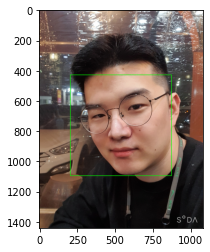

In [6]:
# 찾은 얼굴 영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크 (Face Landmark)

In [7]:
# landmark model 불러오기
model_path = os.getenv('HOME')+'/aiffel/Ex_3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장.
    # point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))  # landmark model 불러오기.

68


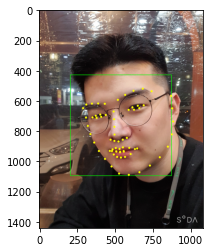

In [9]:
# landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 7, (0, 255, 255), -1)  # 노란점이 잘 보이지 않아서 point 키워서 출력.

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 불러오기 & 스티커 위치 적용 하기

https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

In [10]:
# 코의 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])  # 코의 index는 30.
    x = landmark[30][0]  # x축
    y = landmark[30][1]  # y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(497, 822)
(x,y) : (497,822)
(w,h) : (667,667)


(667, 667, 3)


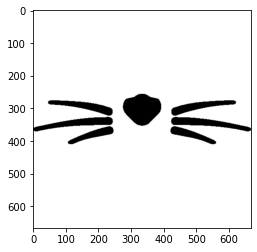

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/Ex_3/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [12]:
# 스티커 이미지 추가를 위해 x, y 좌표 조정
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (164,489)


In [13]:
# 스티커가 원본 이미지의 범위를 넘어가는 경우 : 음수좌표 -> 사실상 코에 입히느라 의미가...
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (164,489)


In [14]:
# 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지
# img_sticker==0 -> img_sticker==255
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

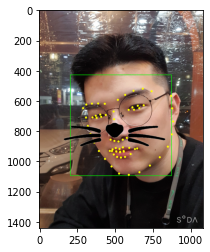

In [15]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 최종 결과 이미지

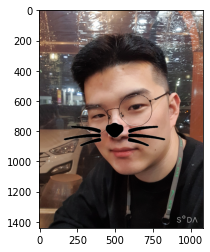

In [16]:
# bounding box, landmark 를 제거한 최종 결과 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 생각해보기...

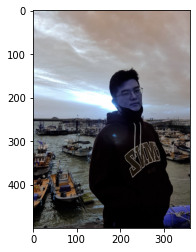

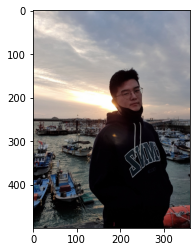

In [17]:
# opencv로 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/Ex_3/images/dark_face.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (360, 500)) #resize
img_show = img_bgr.copy()  # 출력용 이미지 보관.
plt.imshow(img_bgr)
plt.show()

# RGB 변환 : openCV 는 BGR이기 때문.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(197, 170) (259, 232)]]


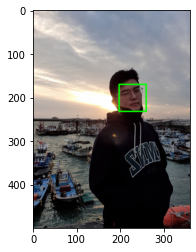

68


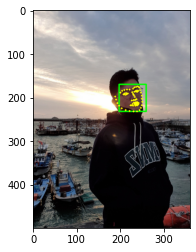

In [18]:
# HOG Detector 선언
detector_hog = dlib.get_frontal_face_detector()

# Bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # 두번째 파라미터 1은 이미지 피라미드의 수.

# 찾은 얼굴 영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


# landmark model 불러오기
model_path = os.getenv('HOME')+'/aiffel/Ex_3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장.
    # point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))  # landmark model 불러오기.

# landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(233, 199)
(x,y) : (233,199)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (202,168)


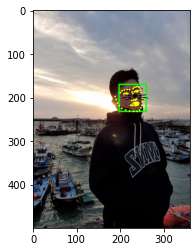

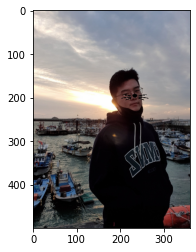

In [19]:
# 코의 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])  # 코의 index는 30.
    x = landmark[30][0]  # x축
    y = landmark[30][1]  # y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/Ex_3/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

# 스티커 이미지 추가를 위해 x, y 좌표 조정
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지
# img_sticker==0 -> img_sticker==255
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# bounding box, landmark 를 제거한 최종 결과 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

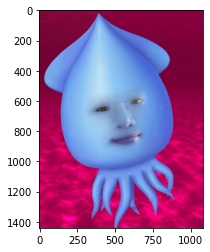

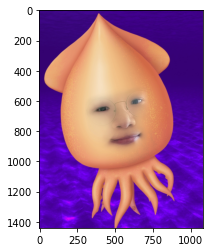

In [20]:
# opencv로 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/Ex_3/images/snap_face.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()  # 출력용 이미지 보관.
plt.imshow(img_bgr)
plt.show()

# RGB 변환 : openCV 는 BGR이기 때문.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(297, 502) (759, 965)]]


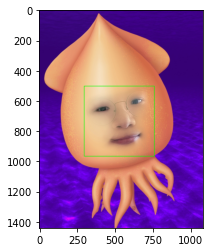

68


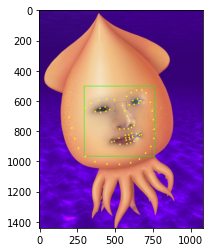

In [21]:
# HOG Detector 선언
detector_hog = dlib.get_frontal_face_detector()

# Bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # 두번째 파라미터 1은 이미지 피라미드의 수.

# 찾은 얼굴 영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


# landmark model 불러오기
model_path = os.getenv('HOME')+'/aiffel/Ex_3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장.
    # point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))  # landmark model 불러오기.

# landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(596, 735)
(x,y) : (596,735)
(w,h) : (463,463)
(463, 463, 3)
(x,y) : (365,504)


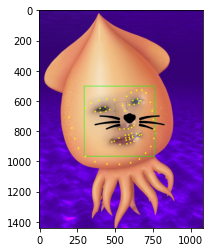

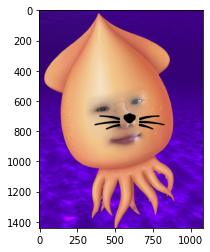

In [22]:
# 코의 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])  # 코의 index는 30.
    x = landmark[30][0]  # x축
    y = landmark[30][1]  # y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/Ex_3/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

# 스티커 이미지 추가를 위해 x, y 좌표 조정
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지
# img_sticker==0 -> img_sticker==255
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# bounding box, landmark 를 제거한 최종 결과 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

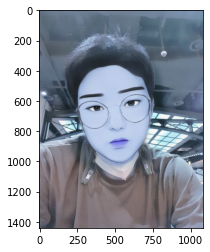

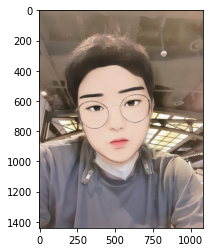

In [23]:
# opencv로 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/Ex_3/images/snap-face.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()  # 출력용 이미지 보관.
plt.imshow(img_bgr)
plt.show()

# RGB 변환 : openCV 는 BGR이기 때문.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(233, 480) (788, 1035)]]


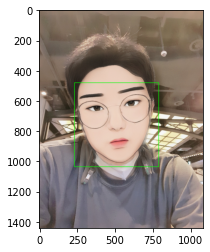

68


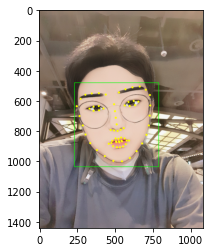

In [24]:
# HOG Detector 선언
detector_hog = dlib.get_frontal_face_detector()

# Bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # 두번째 파라미터 1은 이미지 피라미드의 수.

# 찾은 얼굴 영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


# landmark model 불러오기
model_path = os.getenv('HOME')+'/aiffel/Ex_3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장.
    # point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))  # landmark model 불러오기.

# landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 7, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(511, 755)
(x,y) : (511,755)
(w,h) : (556,556)
(556, 556, 3)
(x,y) : (233,477)


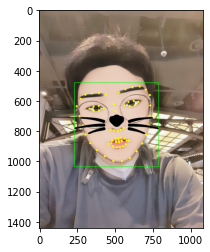

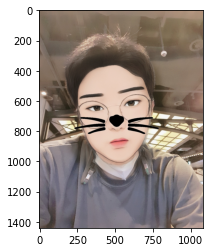

In [25]:
# 코의 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])  # 코의 index는 30.
    x = landmark[30][0]  # x축
    y = landmark[30][1]  # y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/Ex_3/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

# 스티커 이미지 추가를 위해 x, y 좌표 조정
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지
# img_sticker==0 -> img_sticker==255
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# bounding box, landmark 를 제거한 최종 결과 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

고양이 수염을 다운받아서 다양한 사진에 붙여보는 실습을 했다.
여러가지 생각을 해보고 실험을 해보았다.(물론 다 해보지는 못했다...ㅠ)
- 각도가 다른 사진 -> 사실 이건 스티커의 좌표도 조정하고 아니면 오른쪽 수염, 중앙 코, 왼쪽 수염 3분할로 해서 위치조정을 시켜야 하는데 음... 어렵다 ㅠ
- 강아지나 고양이 같이 사람이 아닌 사진 -> 인식이 안되어 실패!
- 필터들어간 스냅 사진 -> 얼굴이 있어서 나름 인식을 하여 스티커가 잘 붙여진다. 마찬가지로 각도같은게 더 자연스러워야 한다.
- 멀리서 찍은 사진 -> 마스크도 쓴 사진이어서(요즘 마스크쓰고 찍은 사진...없는걸로 했어야 하는데...) 인식 불가!
- 마스크를 쓴 사진 -> 참고할 때 어떤 분은 부분만 있어도 인식하길래 해보았지만 인식 실패!
- 밝기(조명)차이있는 사진 -> 사실 더 어두운 사진을 원했으나 일단은 인식이 되어서 스티커가 붙여졌지만 자연스러움 추구...
- 여려명 있는 사진 -> 깜빡하고 해보지 못했다. 추후에 또 해보겠다.
등등... 사실 회전이나 각도같은 자연스러움을 추구해보고 싶었지만 구현이 아직 부족했다.